In [1]:
import pandas as pd

df = pd.read_excel('Online Retail.xlsx')
df.head()


,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [5]:
print(df.columns)


Index(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'], dtype='object')


In [17]:
import pandas as pd

# Load Excel file
df = pd.read_excel('Online Retail.xlsx', header=None)

# Rename column
df.columns = ['items']

# Display first 5 rows
df.head()


,items
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [19]:
# Convert comma-separated strings to lists
transactions = df['items'].apply(lambda x: str(x).split(',')).tolist()

# View sample transactions
transactions[:5]


[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]

In [23]:
!pip install mlxtend

from mlxtend.preprocessing import TransactionEncoder

# Initialize encoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert to DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

df_encoded.head()


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 7.0 MB/s eta 0:00:00


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [25]:
from mlxtend.frequent_patterns import apriori, association_rules

# Get frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

# View frequent itemsets
frequent_itemsets.head()


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.033729,(brownies)
3,0.087188,(burgers)
4,0.030129,(butter)


In [27]:
# Generate rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display key columns
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()


,antecedents,consequents,support,confidence,lift
0,(eggs),(burgers),0.028796,0.160237,1.837830
1,(burgers),(eggs),0.028796,0.330275,1.837830
2,(french fries),(burgers),0.021997,0.128705,1.476173
3,(burgers),(french fries),0.021997,0.252294,1.476173
4,(burgers),(mineral water),0.024397,0.279817,1.173883


In [29]:
# Filter strong rules
strong_rules = rules[(rules['confidence'] > 0.4) & (rules['lift'] > 1.2)]

# Show top rules
strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
62,(ground beef),(mineral water),0.040928,0.416554,1.747522
72,(olive oil),(mineral water),0.027596,0.419028,1.757904
78,(soup),(mineral water),0.023064,0.456464,1.914955


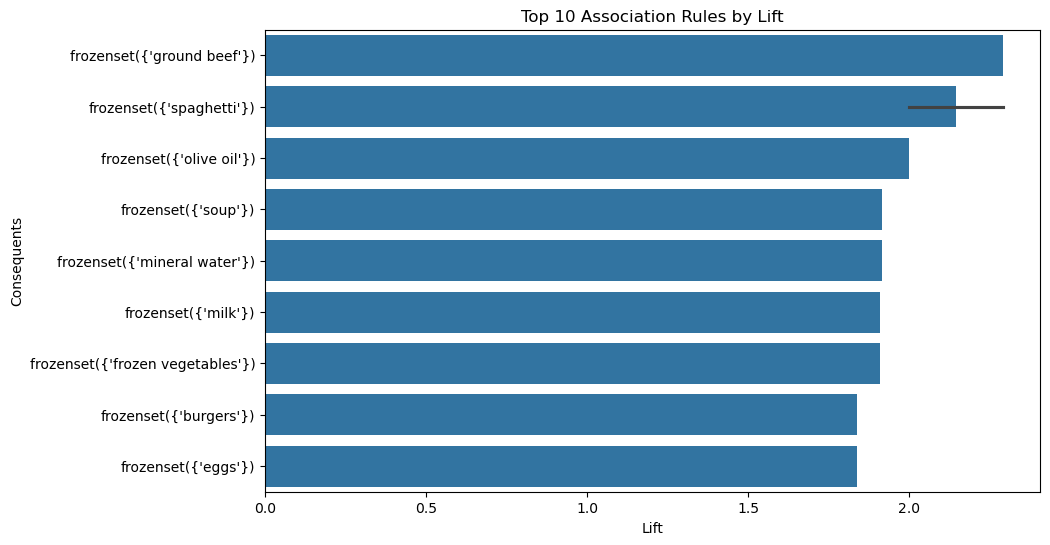

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 rules by lift
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_rules['lift'], y=top_rules['consequents'].astype(str))
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Consequents')
plt.show()
